<a href="https://colab.research.google.com/github/nehapokharel/AI-workshop-assignment/blob/master/Machine_learning_using_real_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset is focused on the crops which can reflect the price area and other attributes from that one can predict for future price yield by using some better attributes.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import category_encoders
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving corn yield.csv to corn yield (3).csv


In [ ]:
df = pd.read_csv("corn yield.csv", delimiter = ",")

In [ ]:
df.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"245,000",NaN
1,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"36,015,000",NaN
2,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"9,000",NaN
3,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",TOTAL,NOT SPECIFIED,15,NaN
4,SURVEY,2015,YEAR,NaN,STATE,ARIZONA,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"34,000",NaN


In [ ]:
df.tail()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
23469,SURVEY,1866,YEAR,NaN,STATE,VIRGINIA,51.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"16,200,000",NaN
23470,SURVEY,1866,YEAR,NaN,STATE,WEST VIRGINIA,54.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"300,000",NaN
23471,SURVEY,1866,YEAR,NaN,STATE,WEST VIRGINIA,54.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"7,800,000",NaN
23472,SURVEY,1866,YEAR,NaN,STATE,WISCONSIN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"500,000",NaN
23473,SURVEY,1866,YEAR,NaN,STATE,WISCONSIN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"14,250,000",NaN


In [ ]:
df.isnull().sum()

Program                 0
Year                    0
Period                  0
Week Ending         23474
Geo Level               0
State                   0
State ANSI             34
Ag District         23474
Ag District Code    23474
County              23474
County ANSI         23474
Zip Code            23474
Region              23474
watershed_code          0
Watershed           23474
Commodity               0
Data Item               0
Domain                  0
Domain Category         0
Value                   0
CV (%)              23474
dtype: int64

In [ ]:
null_value_cols = ["Program", "Week Ending","Ag District","Ag District Code","County","County ANSI","Zip Code","Region","Watershed","CV (%)","Domain Category","Commodity","Geo Level","watershed_code","Domain"]

In [ ]:
df.drop(columns = null_value_cols, axis = 1, inplace=True)

In [ ]:
df.shape


(23474, 6)

In [ ]:
df.size

140844

In [ ]:
df.info

<bound method DataFrame.info of        Year Period  ...                                      Data Item       Value
0      2015   YEAR  ...                  CORN, GRAIN - ACRES HARVESTED     245,000
1      2015   YEAR  ...       CORN, GRAIN - PRODUCTION, MEASURED IN BU  36,015,000
2      2015   YEAR  ...                 CORN, SILAGE - ACRES HARVESTED       9,000
3      2015   YEAR  ...  CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE          15
4      2015   YEAR  ...                  CORN, GRAIN - ACRES HARVESTED      34,000
...     ...    ...  ...                                            ...         ...
23469  1866   YEAR  ...       CORN, GRAIN - PRODUCTION, MEASURED IN BU  16,200,000
23470  1866   YEAR  ...                  CORN, GRAIN - ACRES HARVESTED     300,000
23471  1866   YEAR  ...       CORN, GRAIN - PRODUCTION, MEASURED IN BU   7,800,000
23472  1866   YEAR  ...                  CORN, GRAIN - ACRES HARVESTED     500,000
23473  1866   YEAR  ...       CORN, GRAIN - PRODUCTION,

In [ ]:
df.describe()

,Year,State ANSI
count,23474.000000,23440.000000
mean,1954.280907,30.023379
std,40.371092,15.388973
min,1866.000000,1.000000
25%,1925.000000,18.000000
50%,1956.000000,30.000000
75%,1989.000000,42.000000
max,2015.000000,56.000000


In [ ]:
df = df.fillna(0)
df["Value"] = df["Value"].str.replace(',','')
df["State ANSI"] = df["State ANSI"].astype("int")
df["Value"] = df["Value"].astype("float")

In [ ]:
def one_hot_encoding(df,column):
    one_hot_encoder=category_encoders.OneHotEncoder(cols=column,return_df=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final

In [ ]:
df = one_hot_encoding(df,"Period")
df = one_hot_encoding(df,"Data Item")
df = one_hot_encoding(df,"State")

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
X = df.drop("Value",axis = 1)
Y = df["Value"]

In [ ]:
X

,Year,Period_1,Period_2,Period_3,Period_4,Period_5,Period_6,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,State_10,State_11,State_12,State_13,State_14,State_15,State_16,State_17,State_18,State_19,State_20,State_21,State_22,State_23,State_24,State_25,State_26,State_27,State_28,State_29,State_30,State_31,State_32,State_33,State_34,State_35,State_36,State_37,State_38,State_39,State_40,State_41,State_42,State_43,State_44,State_45,State_46,State_47,State_48,State_49,State ANSI,Data Item_1,Data Item_2,Data Item_3,Data Item_4
0,2015,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,2015,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,2015,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,2015,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,2015,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23469,1866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,51,0,1,0,0
23470,1866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,54,1,0,0,0
23471,1866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,54,0,1,0,0
23472,1866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,55,1,0,0,0


In [ ]:
Y

0          245000.0
1        36015000.0
2            9000.0
3              15.0
4           34000.0
            ...    
23469    16200000.0
23470      300000.0
23471     7800000.0
23472      500000.0
23473    14250000.0
Name: Value, Length: 23474, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=27,test_size=0.2)

In [ ]:
clf = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_pred,y_test)
mse

787189436223556.9

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


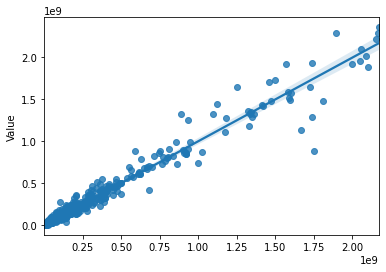

In [ ]:
plot = sns.regplot(y_pred,y_test)


In [ ]:
r2_score(y_test, y_pred)

0.9731855526928275